## Task 2.1 
Visualize the univariate distribution of each feature, and the distribution of the target.

In [14]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestCentroid
import matplotlib.pyplot as plt

In [2]:
covtype = datasets.fetch_covtype(download_if_missing=True)

In [4]:
ct = pd.DataFrame(data= np.c_[covtype['data'], covtype['target']])

I decided to examine just the non-binary features because the binary features would just be two lines at x = {0,1}. Histograms of the first 10 features (all non-binary) are shown below, as well as the distribution of the 7 classifications for covertype:

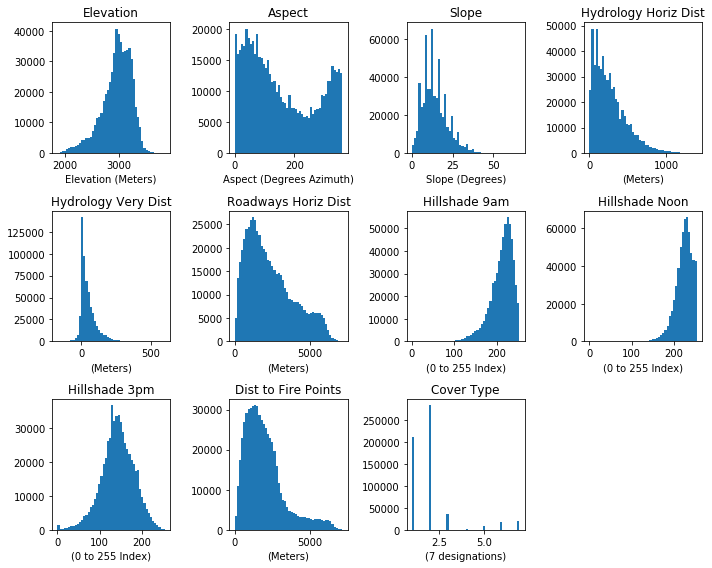

In [79]:
# Plotting only non-binary features
fig=plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(3,4,1)
ax1.hist(covtype.data[:,0],bins = 50)
plt.title('Elevation')
plt.xlabel('Elevation (Meters)')

ax2 = fig.add_subplot(3,4,2)
ax2.hist(covtype.data[:,1],bins = 50)
plt.title('Aspect')
plt.xlabel('Aspect (Degrees Azimuth)')

ax3 = fig.add_subplot(3,4,3)
ax3.hist(covtype.data[:,2],bins = 50)
plt.title('Slope')
plt.xlabel('Slope (Degrees)')

ax4 = fig.add_subplot(3,4,4)
ax4.hist(covtype.data[:,3],bins = 50)
plt.title('Hydrology Horiz Dist')
plt.xlabel('(Meters)')

ax5 = fig.add_subplot(3,4,5)
ax5.hist(covtype.data[:,4],bins = 50)
plt.title('Hydrology Very Dist')
plt.xlabel('(Meters)')

ax6 = fig.add_subplot(3,4,6)
ax6.hist(covtype.data[:,5],bins = 50)
plt.title('Roadways Horiz Dist')
plt.xlabel('(Meters)')

ax7 = fig.add_subplot(3,4,7)
ax7.hist(covtype.data[:,6],bins = 50)
plt.title('Hillshade 9am')
plt.xlabel('(0 to 255 Index)')

ax8 = fig.add_subplot(3,4,8)
ax8.hist(covtype.data[:,7],bins = 50)
plt.title('Hillshade Noon')
plt.xlabel('(0 to 255 Index)')

ax9 = fig.add_subplot(3,4,9)
ax9.hist(covtype.data[:,8],bins = 50)
plt.title('Hillshade 3pm')
plt.xlabel('(0 to 255 Index)')

ax10 = fig.add_subplot(3,4,10)
ax10.hist(covtype.data[:,9],bins = 50)
plt.title('Dist to Fire Points')
plt.xlabel('(Meters)')

ax11 = fig.add_subplot(3,4,11)
ax11.hist(covtype.target,bins = 50)
plt.title('Cover Type')
plt.xlabel('(7 designations)')

plt.tight_layout()
plt.show()

## Task 2.2 
Split data into training and test set. Evaluate Logistic Regression, linear support vector machines and nearest centroids using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?

In [6]:
X = ct.loc[:,0:53]
y = pd.DataFrame(ct)[54]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
logreg = LogisticRegression(multi_class="multinomial", 
                            solver="lbfgs").fit(X_train, y_train)
np.mean(cross_val_score(logreg, X_train, y_train, cv=3))

0.6198426390382038

In [12]:
linearsvm = LinearSVC(dual=False).fit(X_train, y_train)
np.mean(cross_val_score(linearsvm, X_train, y_train, cv=3))

0.70413467318167677

In [15]:
np.mean(cross_val_score(NearestCentroid(), X_train, y_train, cv=3))

0.19358635661865708

Linear support vector machines appear to have the best cv score (0.7041), while Logistic Regression has a cv score of 0.6198, and Nearest Centroid performs the worst by far with a cv score of 0.1936. Now to see if scaling the data with StandardScaler helps:

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(multi_class="multinomial", 
                            solver="lbfgs").fit(X_train_scaled, y_train)
np.mean(cross_val_score(logreg, X_train_scaled, y_train, cv=3))

0.72387031594375539

In [17]:
svm = LinearSVC(dual=False).fit(X_train_scaled, y_train)
np.mean(cross_val_score(svm, X_train_scaled, y_train, cv=3))

0.71272195239071812

In [18]:
nc = NearestCentroid().fit(X_train_scaled, y_train)
np.mean(cross_val_score(nc, X_train_scaled, y_train, cv=3))

0.54986125682822429

Scaling the data improved the cv score for Logistic Regression from 0.7041 to 0.7283. Linear svms also saw an increase in cv score, although it was a smaller increase - from 0.7041 to 0.7127. Scaling the data improved the Nearest Centroid method the most: the cv score increase from 0.1936 to 0.5499.

## Task 2.3 
Tune the parameters using GridSearchCV. Do the results improve? Visualize the performance as function of the parameters for all three models.

Based on the improvements using the scaled data shown above, I decided to use the scaled data with GridSearchCV for Logistic Regression, Linear SVMs, and Nearest Centroid in order to achieve the highest possible cv score for each method.

In [21]:
# GridSearchCV for Logistic Regression
param_grid_lr = {'C': [0.1, 1, 100]}
grid_lr = GridSearchCV(LogisticRegression(multi_class="multinomial", 
                                          solver="lbfgs"), param_grid_lr, cv=3)
grid_lr.fit(X_train_scaled, y_train)
np.mean(cross_val_score(grid_lr, X_train_scaled, y_train, cv=3))

0.72390703452991512

In [22]:
# GridSearchCV for Linear SVM
param_grid_svm = {'C': [0.1, 1, 100]}
grid_svm = GridSearchCV(LinearSVC(dual=False), param_grid_svm, cv=3)
grid_svm.fit(X_train_scaled, y_train)
np.mean(cross_val_score(grid_svm, X_train_scaled, y_train, cv=3))

0.70452246929330586

In [23]:
# GridSearchCV for Nearest Centroid
param_grid_nc = {'shrink_threshold': [0, 0.4, 0.8]}
grid_nc = GridSearchCV(NearestCentroid(), param_grid_nc, cv=3)
grid_nc.fit(X_train_scaled, y_train)
np.mean(cross_val_score(grid_nc, X_train_scaled, y_train, cv=3))

0.54986125682822429

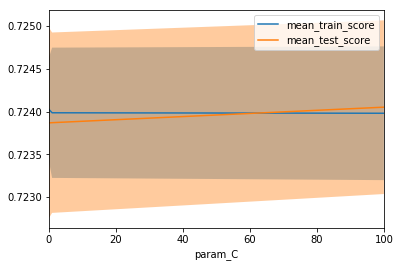

In [29]:
import warnings
warnings.filterwarnings('ignore')

results = pd.DataFrame(grid_lr.cv_results_)
results.plot('param_C', 'mean_train_score')
results.plot('param_C', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_C.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha = 0.4)
plt.fill_between(results.param_C.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha = 0.4)
plt.legend()
plt.show()

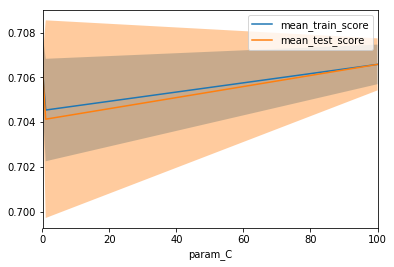

In [30]:
results = pd.DataFrame(grid_svm.cv_results_)
results.plot('param_C', 'mean_train_score')
results.plot('param_C', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_C.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.4)
plt.fill_between(results.param_C.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.4)
plt.legend()
plt.show()

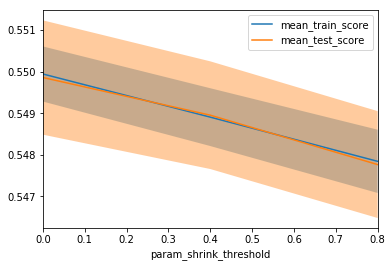

In [31]:
results = pd.DataFrame(grid_nc.cv_results_)
results.plot('param_shrink_threshold', 'mean_train_score')
results.plot('param_shrink_threshold', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_shrink_threshold.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.4)
plt.fill_between(results.param_shrink_threshold.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.4)
plt.legend()
plt.show()

For logistic regression, the training set seems to perform similarly across all values of C, but there is slight improvement in the test set as C increases. With the Linear SVM model, both the training and test set cv scores improve as C increases (and appears to have a slight kink just after C = 0). Nearest Centroid performs best at lower shrink thresholds, as both the training and test set peak at about 0.55 and then steadily decline as shrink threshold increases.

## Task 2.4 
Change the cross-validation strategy from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters that are found change? Do they change if you change the random seed of the shuffling? Or if you change the split into training and test data?

In [32]:
# GridSearchCV for Logistic Regression, with KFold + shuffling
from sklearn.model_selection import KFold
param_grid_lr = {'C': [0.1, 1, 100]}
kf = KFold(n_splits=3, shuffle=True, random_state=0)
grid_lr1 = GridSearchCV(LogisticRegression(multi_class="multinomial", solver="lbfgs"),
                       param_grid_lr, cv=kf)
grid_lr1.fit(X_train_scaled, y_train)
np.mean(cross_val_score(grid_lr1, X_train_scaled, y_train))

0.72390703452991512

In [33]:
# GridSearchCV for Linear SVM, with KFold + shuffling
param_grid_svm = {'C': [0.1, 1, 100]}
kf = KFold(n_splits=3, shuffle=True, random_state=0)
grid_svm1 = GridSearchCV(LinearSVC(dual=False), param_grid_svm, cv=kf)
grid_svm1.fit(X_train_scaled, y_train)
np.mean(cross_val_score(grid_svm1, X_train_scaled, y_train))

0.71272424718978156

In [34]:
# GridSearchCV for Nearest Centroid, with KFold + shuffling
param_grid_nc = {'shrink_threshold': [0, 0.4, 0.8]}
kf = KFold(n_splits=3, shuffle=True, random_state=0)
grid_nc1 = GridSearchCV(NearestCentroid(), param_grid_nc, cv=kf)
grid_nc1.fit(X_train_scaled, y_train)
np.mean(cross_val_score(grid_nc1, X_train_scaled, y_train))

0.54986125682822429

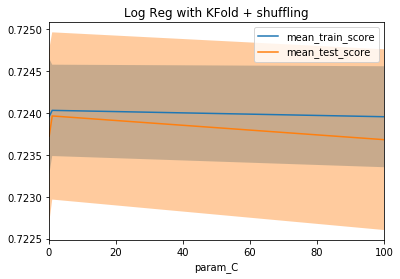

In [57]:
results = pd.DataFrame(grid_lr1.cv_results_)
results.plot('param_C', 'mean_train_score')
results.plot('param_C', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_C.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha = 0.4)
plt.fill_between(results.param_C.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha = 0.4)
plt.legend()
plt.title('Log Reg with KFold + shuffling')
plt.show()

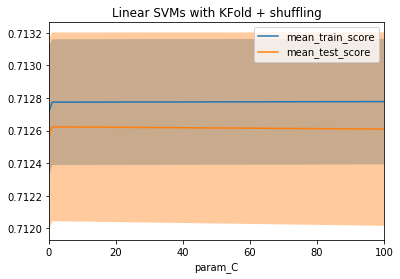

In [58]:
results = pd.DataFrame(grid_svm1.cv_results_)
results.plot('param_C', 'mean_train_score')
results.plot('param_C', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_C.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.4)
plt.fill_between(results.param_C.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.4)
plt.legend()
plt.title('Linear SVMs with KFold + shuffling')
plt.show()

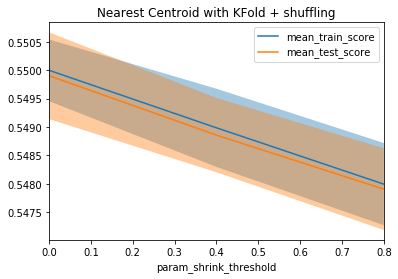

In [59]:
results = pd.DataFrame(grid_nc1.cv_results_)
results.plot('param_shrink_threshold', 'mean_train_score')
results.plot('param_shrink_threshold', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_shrink_threshold.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.4)
plt.fill_between(results.param_shrink_threshold.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.4)
plt.legend()
plt.title('Nearest Centroid with KFold + shuffling')
plt.show()

Switching to KFold with shuffling does not appear to have affected the cv score for the logistic regression training set, but the cv score for the test set does decrease as C increases (whereas with stratified k-folding the score increase as C increased). Linear SVMs' cv scores appear to plateau regardless of C value, which is different from the steady increase we saw with stratified k-folding. Nearest Centroid with k-fold with shuffling displays a very similar trend to stratified k-folding: steady decline in cv score from 0.55 to about 0.548 as shrink threshold increases from 0 to 0.8. The one thing of note is that the slope seems a bit steeper for Nearest Centroid with kfold and shuffling.

Now to switch the random state argument:

In [39]:
# GridSearchCV for Logistic Regression, with KFold + shuffling, random_state=8
from sklearn.model_selection import KFold
param_grid_lr = {'C': [0.1, 1, 100]}
kf = KFold(n_splits=3, shuffle=True, random_state=8)
grid_lr2 = GridSearchCV(LogisticRegression(multi_class="multinomial", solver="lbfgs"),
                       param_grid_lr, cv=kf)
grid_lr2.fit(X_train_scaled, y_train)
np.mean(cross_val_score(grid_lr2, X_train_scaled, y_train))

0.72387031594375539

In [40]:
# GridSearchCV for Linear SVM, with KFold + shuffling, random_state=8
param_grid_svm = {'C': [0.1, 1, 100]}
kf = KFold(n_splits=3, shuffle=True, random_state=8)
grid_svm2 = GridSearchCV(LinearSVC(dual=False), param_grid_svm, cv=kf)
grid_svm2.fit(X_train_scaled, y_train)
np.mean(cross_val_score(grid_svm2, X_train_scaled, y_train))

0.71272424718978156

In [41]:
# GridSearchCV for Nearest Centroid, with KFold + shuffling, random_state=8
param_grid_nc = {'shrink_threshold': [0, 0.4, 0.8]}
kf = KFold(n_splits=3, shuffle=True, random_state=8)
grid_nc2 = GridSearchCV(NearestCentroid(), param_grid_nc, cv=kf)
grid_nc2.fit(X_train_scaled, y_train)
np.mean(cross_val_score(grid_nc2, X_train_scaled, y_train))

0.54986125682822429

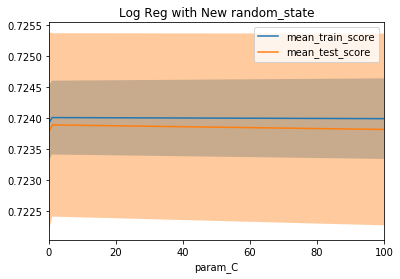

In [60]:
results = pd.DataFrame(grid_lr2.cv_results_)
results.plot('param_C', 'mean_train_score')
results.plot('param_C', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_C.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha = 0.4)
plt.fill_between(results.param_C.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha = 0.4)
plt.legend()
plt.title('Log Reg with New random_state')
plt.show()

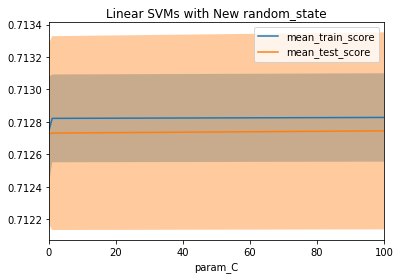

In [61]:
results = pd.DataFrame(grid_svm2.cv_results_)
results.plot('param_C', 'mean_train_score')
results.plot('param_C', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_C.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.4)
plt.fill_between(results.param_C.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.4)
plt.legend()
plt.title('Linear SVMs with New random_state')
plt.show()

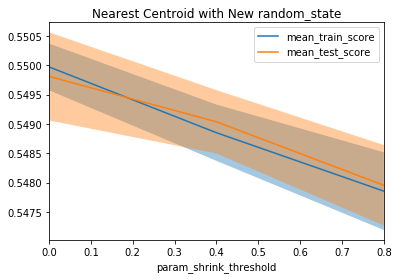

In [62]:
results = pd.DataFrame(grid_nc2.cv_results_)
results.plot('param_shrink_threshold', 'mean_train_score')
results.plot('param_shrink_threshold', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_shrink_threshold.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.4)
plt.fill_between(results.param_shrink_threshold.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.4)
plt.legend()
plt.title('Nearest Centroid with New random_state')
plt.show()

For logistic regression, changing the random state improves the test score compared to the k-fold with shuffling, but it still does not exhibit the upwards trend seen in the default GridSearchCV results. Linear SVMs with new random state are improved over k-fold with shuffling, but there still is no upwards trend in training/test cv scores like there was in the default GridSearchCV results. Nearest Centroid does show interesting improvement- at shrink threshold > 0.2, the test set out-performs the training set, which is better than all previous results.

Now to change the test/train split:

In [38]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.33)
scaler1 = StandardScaler()
scaler1.fit(X_train1)
X_train_scaled1 = scaler1.transform(X_train1)
X_test_scaled1 = scaler1.transform(X_test1)

In [45]:
# GridSearchCV for Logistic Regression with new test/train split
param_grid_lr = {'C': [0.1, 1, 100]}
grid_lr4 = GridSearchCV(LogisticRegression(multi_class="multinomial", 
                                           solver="lbfgs"), param_grid_lr, cv=3)
grid_lr4.fit(X_train_scaled1, y_train1)
np.mean(cross_val_score(grid_lr4, X_train_scaled1, y_train1, cv=3))

0.72386829805122221

In [46]:
# GridSearchCV for Linear SVM with new test/train split
param_grid_svm = {'C': [0.1, 1, 100]}
grid_svm4 = GridSearchCV(LinearSVC(dual=False), param_grid_svm, cv=3)
grid_svm4.fit(X_train_scaled1, y_train1)
np.mean(cross_val_score(grid_svm4, X_train_scaled1, y_train1, cv=3))

0.71263724716139798

In [47]:
# GridSearchCV for Nearest Centroid with new test/train split
param_grid_nc = {'shrink_threshold': [0, 0.4, 0.8]}
grid_nc4 = GridSearchCV(NearestCentroid(), param_grid_nc, cv=3)
grid_nc4.fit(X_train_scaled1, y_train1)
np.mean(cross_val_score(grid_nc4, X_train_scaled1, y_train1, cv=3))

0.54948131485678398

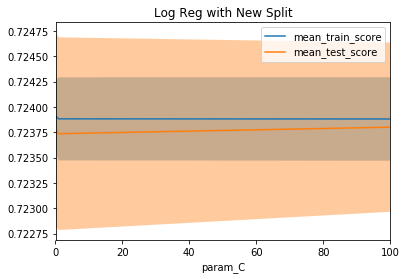

In [56]:
results = pd.DataFrame(grid_lr4.cv_results_)
results.plot('param_C', 'mean_train_score')
results.plot('param_C', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_C.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha = 0.4)
plt.fill_between(results.param_C.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha = 0.4)
plt.legend()
plt.title('Log Reg with New Split')
plt.show()

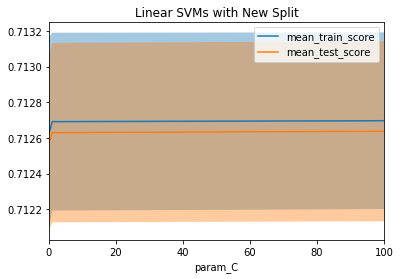

In [63]:
results = pd.DataFrame(grid_svm4.cv_results_)
results.plot('param_C', 'mean_train_score')
results.plot('param_C', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_C.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.4)
plt.fill_between(results.param_C.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.4)
plt.legend()
plt.title('Linear SVMs with New Split')
plt.show()

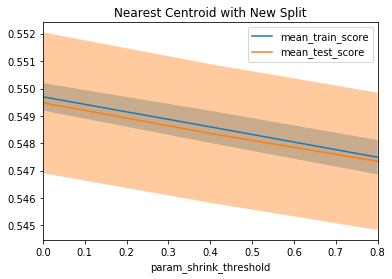

In [64]:
results = pd.DataFrame(grid_nc4.cv_results_)
results.plot('param_shrink_threshold', 'mean_train_score')
results.plot('param_shrink_threshold', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_shrink_threshold.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.4)
plt.fill_between(results.param_shrink_threshold.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.4)
plt.legend()
plt.title('Nearest Centroid with New Split')
plt.show()

For logistic regression, changing the test/train split gave the best test cv scores out of all 3 changes attempted (increasing trend as C increases, just like with the default setting), although the test set doesn't surpass the train set, like it does in default setting. Interestingly, the greatest change observed in the Linear SVM model is that the standard deviation in the training set greatly increased when we changed the test/train split, even though the cv scores/parameter trend stayed the same. Finally, for Nearest Centroid we see an increase in the standard deviation of the test scores, but other than that the trend remains pretty similar, although the test doesn't surpass train like it did when we changed the random state.

## Task 2.5 
Visualize the coefficients for LogisticRegression and Linear Support Vector Machines.

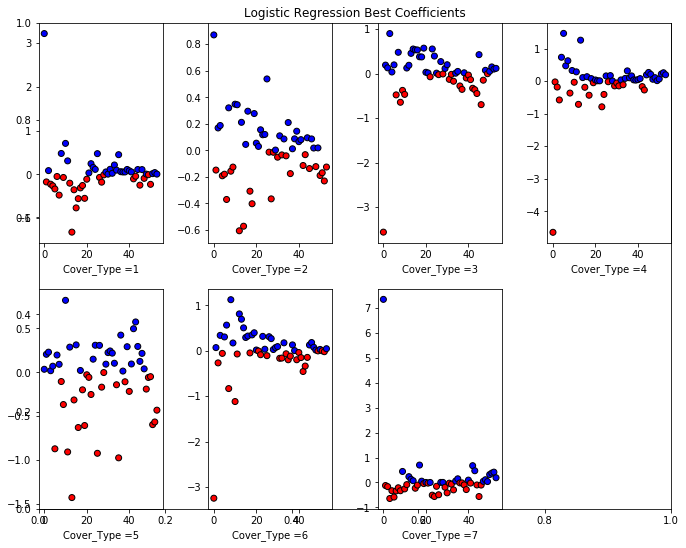

In [107]:
# Plot of Logistic Regression Coefficients
fig=plt.figure(figsize=(10,8))
plt.title('Logistic Regression Best Coefficients')
j = 0
for i in range(0,7):
    j = i + 1
    ax.j = fig.add_subplot(2,4,j)
    plt.scatter(range(X_train.shape[1]),
            logreg.coef_[i], c=np.sign(logreg.coef_[i]), 
            cmap="bwr_r", edgecolor='k')
    plt.xlabel('Cover_Type ='+ str(j))

plt.tight_layout()
plt.show()

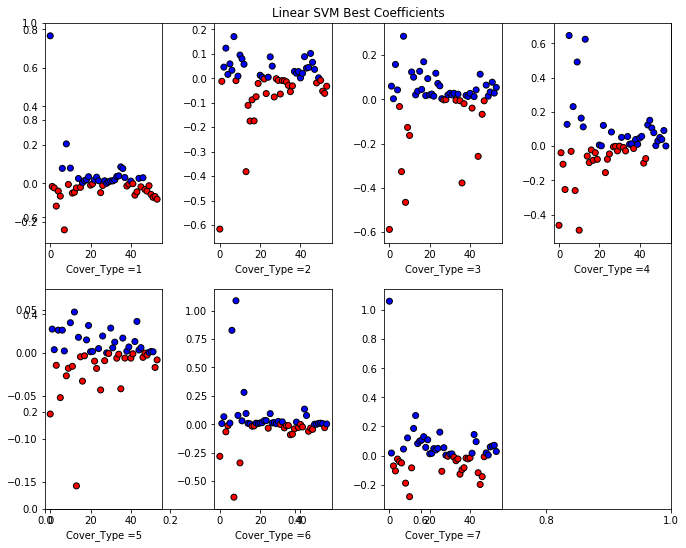

In [108]:
# Plot of Linear SVM Coefficients
fig=plt.figure(figsize=(10,8))
plt.title('Linear SVM Best Coefficients')
j = 0
for i in range(0,7):
    j = i + 1
    ax.j = fig.add_subplot(2,4,j)
    plt.scatter(range(X_train.shape[1]),
            svm.coef_[i], c=np.sign(svm.coef_[i]), 
            cmap="bwr_r", edgecolor='k')
    plt.xlabel('Cover_Type ='+ str(j))

plt.tight_layout()
plt.show()

It seems that Logistic Regression and Linear SVMs agree on similar distributions of the coefficients for each feature for each cover type. The first 10 or so features have non-zero coefficients for most of the cover types (which makes sense because the first 10 features are all non-binary) and the rest of the features have coefficients at or around 0.